## load packages

In [1]:
!pwd
!ls
%cd ..

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/2_eda
eda_combined.ipynb                  eda_origin_data.ipynb
eda_new_data.ipynb                  preliminary_eda_preprocessing.ipynb
/Users/ricky/Desktop/sp23-ancient-artifacts-team8


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## read data

In [3]:
master_micro = pd.read_csv("0_data/master.csv")

In [4]:
micro = master_micro[(master_micro['size_micro']=="unknown")].iloc[: , 1:]

In [5]:
micro

Id  Img Id      Da      Dp  FWidth  FLength  FThickness  ELength  \
0        104   10708  30.893  38.251  36.878   46.822      10.179   44.168   
1         19    5682  27.727  33.375  35.149   40.001       9.029   39.022   
2         14    4826  26.726  36.061  30.199   46.332       8.025   47.365   
3          1    2812  24.408  36.198  25.039   57.353       5.086   50.536   
4         83    9441  22.869  29.388  24.044   39.820       4.390   38.568   
...      ...     ...     ...     ...     ...      ...         ...      ...   
78607  56682   19419   0.037   0.089   0.019    0.135       0.019    0.044   
78608  71921   26912   0.035   0.064   0.036    0.080       0.036    0.077   
78609  64014   24046   0.035   0.073   0.039    0.087       0.039    0.092   
78610  67033   25158   0.029   0.075   0.040    0.084       0.040    0.095   
78611  61189   22586   0.024   0.071   0.035    0.082       0.035    0.105   

       EThickness  EWidth  ...  T/W Ratio  CHull Surface Area   Sieve  \
0          10.102  34.444  ...      0.276            3211.655  23.529   
1           7.978  34.108  ...      0.257            2547.278  22.089   
2           7.753  28.230  ...      0.266            2571.497  19.112   
3           4.904  23.943  ...      0.203            2001.165  15.063   
4           3.948  22.535  ...      0.183            1745.237  14.217   
...           ...     ...  ...        ...                 ...     ...   
78607       0.016   0.016  ...      1.000               0.006   0.019   
78608       0.015   0.015  ...      1.000               0.007   0.036   
78609       0.018   0.018  ...      1.000               0.009   0.039   
78610       0.024   0.024  ...      1.000               0.008   0.040   
78611       0.026   0.026  ...      1.000               0.007   0.035   

       Angularity  Ellipticity  Fiber Length  Fiber Width  Krumbein Rnd  \
0          19.392        4.372        49.768       22.823         0.214   
1          20.688        4.891        37.445        5.128         0.214   
2          21.250        6.110        52.384       17.379         0.219   
3          18.233       10.304        51.467       17.096         0.251   
4          17.086        9.769        36.426        3.135         0.276   
...           ...          ...           ...          ...           ...   
78607       0.000        2.705         0.000        0.000         1.000   
78608      85.000        5.253         0.000        0.000         1.000   
78609       0.000        4.990         0.000        0.000         1.000   
78610     113.333        3.906         0.000        0.000         1.000   
78611     113.333        4.060         0.000        0.000         1.000   

       size_micro  type_micro  
0         unknown      lithic  
1         unknown      lithic  
2         unknown      lithic  
3         unknown      lithic  
4         unknown      lithic  
...           ...         ...  
78607     unknown        soil  
78608     unknown        soil  
78609     unknown        soil  
78610     unknown        soil  
78611     unknown        soil  

[78612 rows x 50 columns]

In [6]:
soil = pd.read_csv("0_data/ArchaeologicalSoilData.csv", skiprows=[1])
lithic = pd.read_csv("0_data/LithicExperimentalData.csv", skiprows=[1])

In [7]:
# pd.set_option('display.max_columns', None)
# soil.head()

In [8]:
# pd.set_option('display.max_columns', None)
# lithic.head()

In [9]:
soil_0125 = pd.read_csv("0_data/Experiment9-SandGravel-0.125mm.csv", skiprows=[1])
soil_025 = pd.read_csv("0_data/Experiment9-SandGravel-0.25mm.csv", skiprows=[1])
soil_05 = pd.read_csv("0_data/Experiment9-SandGravel-0.5mm.csv", skiprows=[1])
soil_1 = pd.read_csv("0_data/Experiment9-SandGravel-1mm.csv", skiprows=[1])
soil_2 = pd.read_csv("0_data/Experiment9-SandGravel-2mm.csv", skiprows=[1])
soil_4 = pd.read_csv("0_data/Experiment9-SandGravel-4mm.csv", skiprows=[1])

## Merge data (labelling)

In [10]:
# Add a new column to indicate the group
soil_0125 = soil_0125.assign(size_micro = '0.125mm')
soil_025 = soil_025.assign(size_micro = '0.25mm')
soil_05 = soil_05.assign(size_micro = '0.5mm')
soil_1 = soil_1.assign(size_micro = '1mm')
soil_2 = soil_2.assign(size_micro = '2mm')
soil_4 = soil_4.assign(size_micro = '4mm')
lithic = lithic.assign(size_micro = 'unknown')
soil = soil.assign(size_micro = 'unknown')

soil_0125 = soil_0125.assign(type_micro = 'soil')
soil_025 = soil_025.assign(type_micro = 'soil')
soil_05 = soil_05.assign(type_micro = 'soil')
soil_1 = soil_1.assign(type_micro = 'soil')
soil_2 = soil_2.assign(type_micro = 'soil')
soil_4 = soil_4.assign(type_micro = 'soil')
lithic = lithic.assign(type_micro = 'lithic')
soil = soil.assign(type_micro = 'soil')

# Concatenate the data sets along the rows
micro_data = pd.concat([lithic,soil,soil_0125,soil_025,soil_05,soil_1,soil_2,soil_4], axis=0)

In [11]:
# micro_data

## Output to master data

In [12]:
# micro_data.to_csv('0_data/master.csv')

## Missingness

In [13]:
missing_values = micro.isnull().sum()
missing_values

Id                    0
Img Id                0
Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
hash                  0
Transparency          0
Curvature             0
Surface Area          0
Filter0               0
Filter1               0
Filter2               0
Filter3               0
Filter4               0
Filter5               0
Filter6               0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Ar

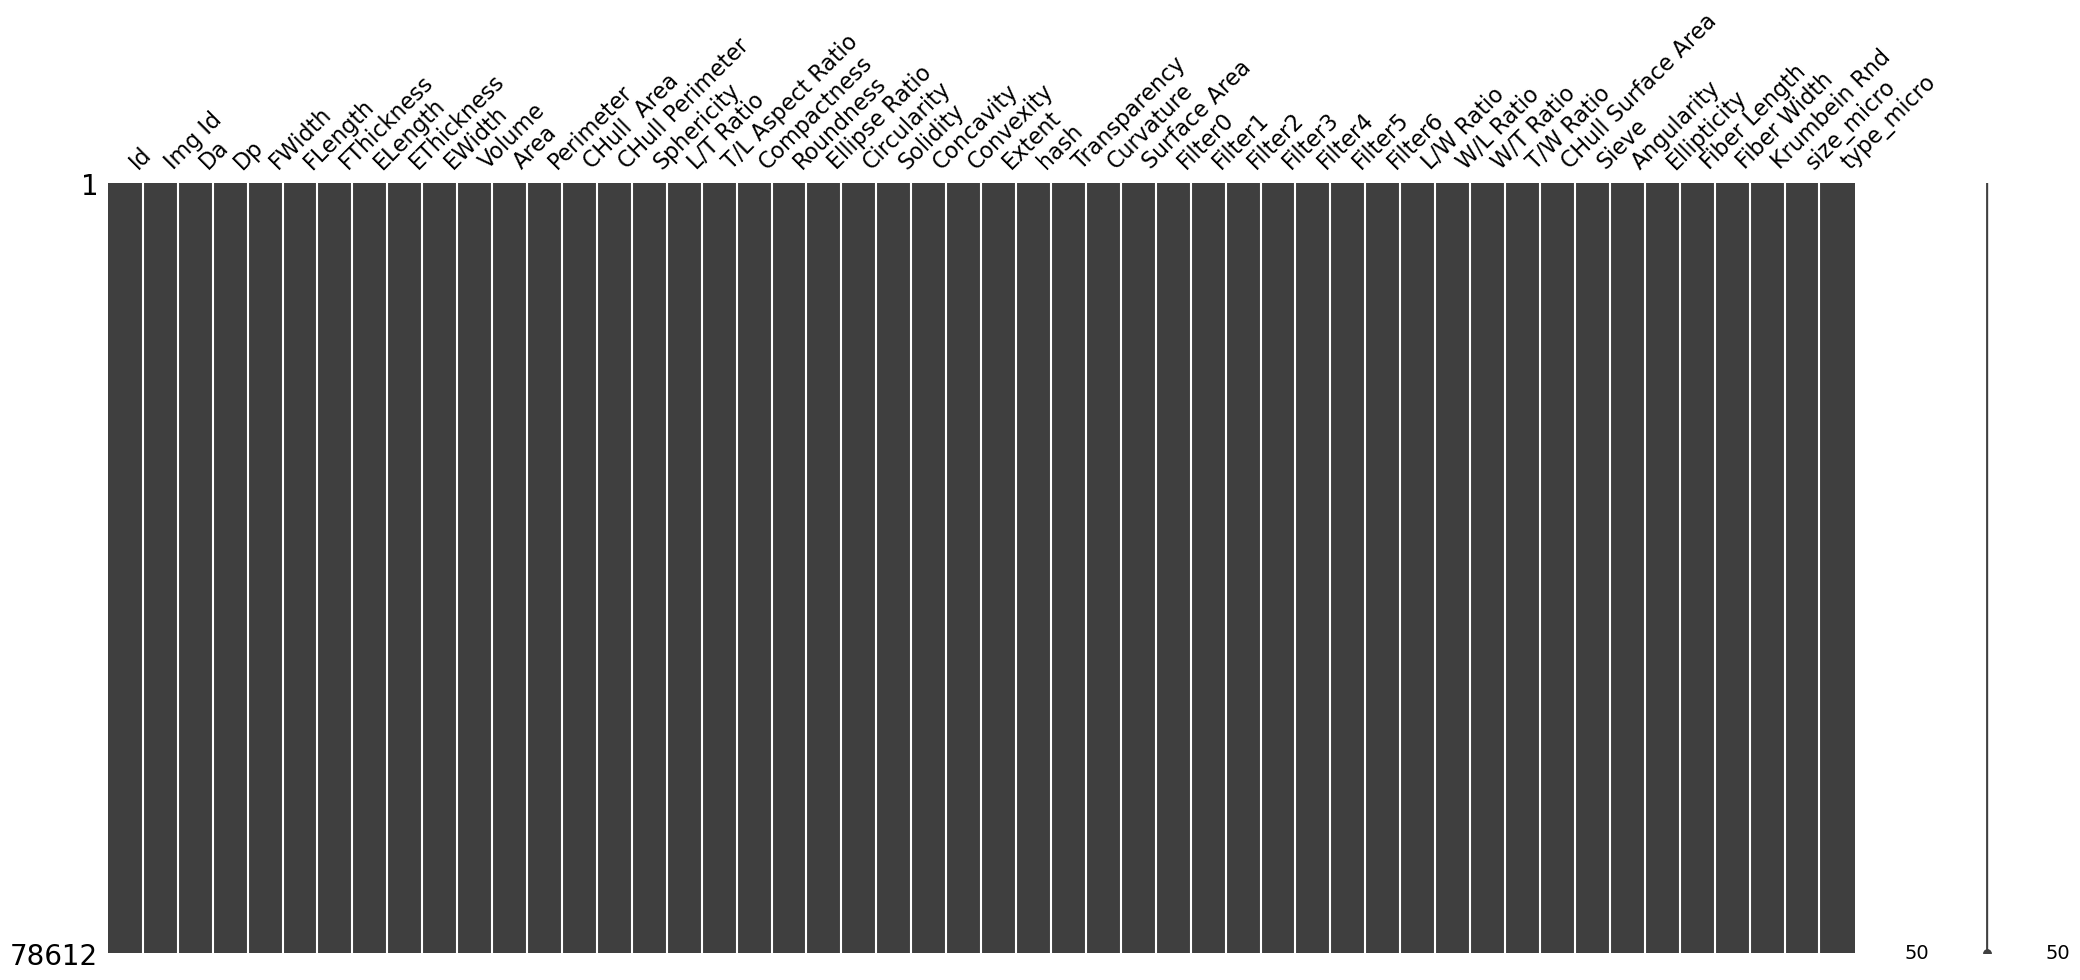

In [14]:
msno.matrix(micro)

## EDA

### Types

In [15]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78612 entries, 0 to 78611
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  78612 non-null  int64  
 1   Img Id              78612 non-null  int64  
 2   Da                  78612 non-null  float64
 3   Dp                  78612 non-null  float64
 4   FWidth              78612 non-null  float64
 5   FLength             78612 non-null  float64
 6   FThickness          78612 non-null  float64
 7   ELength             78612 non-null  float64
 8   EThickness          78612 non-null  float64
 9   EWidth              78612 non-null  float64
 10  Volume              78612 non-null  float64
 11  Area                78612 non-null  float64
 12  Perimeter           78612 non-null  float64
 13  CHull  Area         78612 non-null  float64
 14  CHull Perimeter     78612 non-null  float64
 15  Sphericity          78612 non-null  float64
 16  L/T 

### Convert data type

In [16]:
micro[micro.columns[:30]] = micro[micro.columns[:30]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
micro[micro.columns[37:48]] = micro[micro.columns[37:48]].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [17]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78612 entries, 0 to 78611
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  78612 non-null  int64  
 1   Img Id              78612 non-null  int64  
 2   Da                  78612 non-null  float64
 3   Dp                  78612 non-null  float64
 4   FWidth              78612 non-null  float64
 5   FLength             78612 non-null  float64
 6   FThickness          78612 non-null  float64
 7   ELength             78612 non-null  float64
 8   EThickness          78612 non-null  float64
 9   EWidth              78612 non-null  float64
 10  Volume              78612 non-null  float64
 11  Area                78612 non-null  float64
 12  Perimeter           78612 non-null  float64
 13  CHull  Area         78612 non-null  float64
 14  CHull Perimeter     78612 non-null  float64
 15  Sphericity          78612 non-null  float64
 16  L/T 

### Descriptive Statistics

In [18]:
micro.describe()

Id        Img Id            Da            Dp        FWidth  \
count  78612.000000  78612.000000  78612.000000  78612.000000  78612.000000   
mean   34364.689755  14385.322661      0.243852      0.301559      0.195041   
std    22148.859199   6144.116665      0.559167      0.729674      0.567795   
min        1.000000   2812.000000      0.024000      0.058000      0.019000   
25%    14354.750000   9804.000000      0.152000      0.168000      0.112000   
50%    34007.500000  13410.500000      0.176000      0.201000      0.137000   
75%    53660.250000  17243.000000      0.237000      0.288000      0.180000   
max    73313.000000  28051.000000     30.893000     38.251000     36.878000   

            FLength    FThickness       ELength    EThickness        EWidth  \
count  78612.000000  78612.000000  78612.000000  78612.000000  78612.000000   
mean       0.386564      0.173464      0.383464      0.167423      0.188698   
std        0.966023      0.331183      0.953562      0.317877      0.549453   
min        0.074000      0.019000      0.041000      0.014000      0.014000   
25%        0.192000      0.111000      0.179000      0.105000      0.106000   
50%        0.249000      0.134000      0.238000      0.129000      0.131000   
75%        0.376000      0.173000      0.371000      0.167000      0.173000   
max       57.353000     16.445000     50.536000     16.227000     34.444000   

       ...     W/L Ratio     W/T Ratio     T/W Ratio  CHull Surface Area  \
count  ...  78612.000000  78612.000000  78612.000000        78612.000000   
mean   ...      0.531503      1.042051      0.975258            1.276014   
std    ...      0.180336      0.199869      0.089865           29.308448   
min    ...      0.055000      1.000000      0.146000            0.006000   
25%    ...      0.398000      1.000000      1.000000            0.073000   
50%    ...      0.533000      1.000000      1.000000            0.100000   
75%    ...      0.660000      1.000000      1.000000            0.187000   
max    ...      0.961000      6.841000      1.000000         3211.655000   

              Sieve    Angularity   Ellipticity  Fiber Length   Fiber Width  \
count  78612.000000  78612.000000  78612.000000  78612.000000  78612.000000   
mean       0.184252     54.837759      2.344729      0.299037      0.108112   
std        0.437869     35.115296      1.402694      1.086042      0.399142   
min        0.019000      0.000000      1.000000      0.000000      0.000000   
25%        0.112000      0.000000      1.520000      0.000000      0.000000   
50%        0.136000     68.000000      1.817000      0.132000      0.036000   
75%        0.177000     85.000000      2.698000      0.308000      0.124000   
max       23.529000    132.500000     23.322000     52.384000     22.823000   

       Krumbein Rnd  
count  78612.000000  
mean       0.980079  
std        0.083897  
min        0.168000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 41 columns]

In [19]:
micro.groupby('type_micro').describe()

Id                                                         \
              count     mean           std  min      25%      50%      75%   
type_micro                                                                   
lithic       5299.0   2650.0   1529.833869  1.0   1325.5   2650.0   3974.5   
soil        73313.0  36657.0  21163.784480  1.0  18329.0  36657.0  54985.0   

                      Img Id                ... Fiber Width          \
                max    count          mean  ...         75%     max   
type_micro                                  ...                       
lithic       5299.0   5299.0  16457.526514  ...       0.126  22.823   
soil        73313.0  73313.0  14235.545565  ...       0.123   8.959   

           Krumbein Rnd                                                 
                  count      mean       std    min  25%  50%  75%  max  
type_micro                                                              
lithic           5299.0  0.968601  0.110638  0.202  1.0  1.0  1.0  1.0  
soil            73313.0  0.980909  0.081564  0.168  1.0  1.0  1.0  1.0  

[2 rows x 328 columns]

In [20]:
micro.groupby('size_micro').count()

Id  Img Id     Da     Dp  FWidth  FLength  FThickness  ELength  \
size_micro                                                                      
unknown     78612   78612  78612  78612   78612    78612       78612    78612   

            EThickness  EWidth  ...  W/T Ratio  T/W Ratio  CHull Surface Area  \
size_micro                      ...                                             
unknown          78612   78612  ...      78612      78612               78612   

            Sieve  Angularity  Ellipticity  Fiber Length  Fiber Width  \
size_micro                                                              
unknown     78612       78612        78612         78612        78612   

            Krumbein Rnd  type_micro  
size_micro                            
unknown            78612       78612  

[1 rows x 49 columns]

### Visualizations

#### Means of variables

##### columns 2-9 (Da, Dp, FWidth, FLength, FThickness, ELength, EThickness, EWidth)

In [21]:
mean_by_group = micro.iloc[:, list(range(2,10)) + [-1]].groupby('type_micro').mean()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

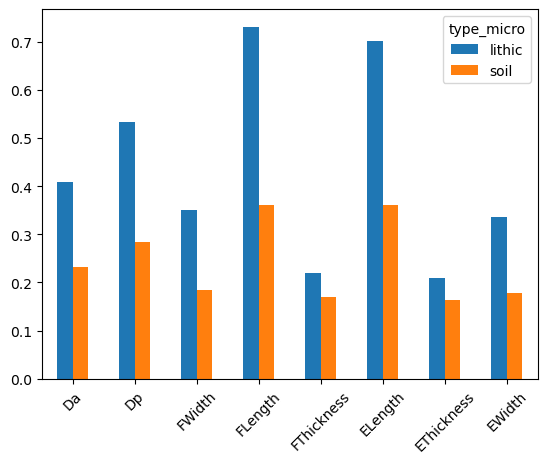

In [22]:
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 10 (Volume)

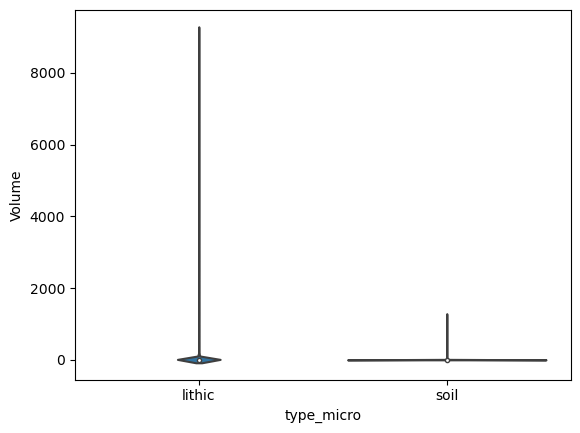

In [23]:
sns.violinplot(x='type_micro', y='Volume', data=micro)

##### columns 11-27 (Area, Perimeter, CHull Area, CHull Perimeter, Sphericity, L/T Ratio, T/L Aspect Ratio, Campactness, Roundness, Ellipse Ratio, Circularity, Solidity, Concavity, Convexity, Extent, Hash, Transparency)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

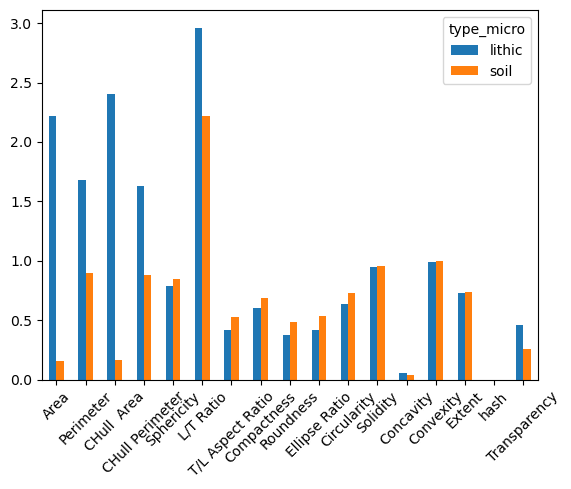

In [24]:
mean_by_group = micro.iloc[:, list(range(11,28)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 28 (Surface Area) - 1

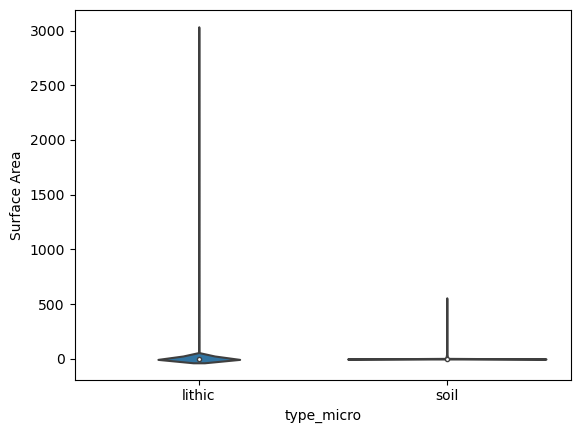

In [25]:
sns.violinplot(x='type_micro', y='Surface Area', data=micro)

##### columns 28 ((Surface Area)) - 2

(array([0]), <a list of 1 Text major ticklabel objects>)

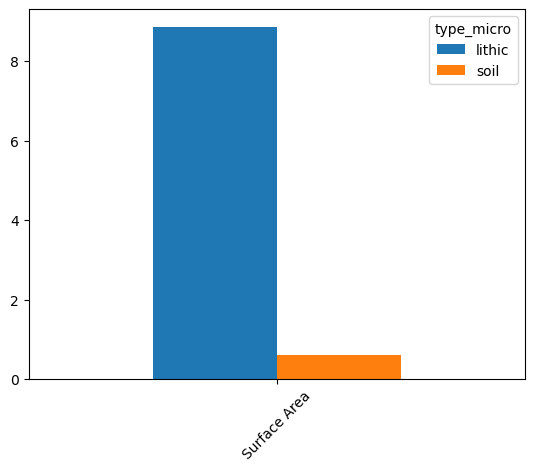

In [26]:
mean_by_group = micro.iloc[:, list(range(29,30)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 37-40 (L/W Ratio, W/L Ratio, W/T Ratio, T/W Ratio)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

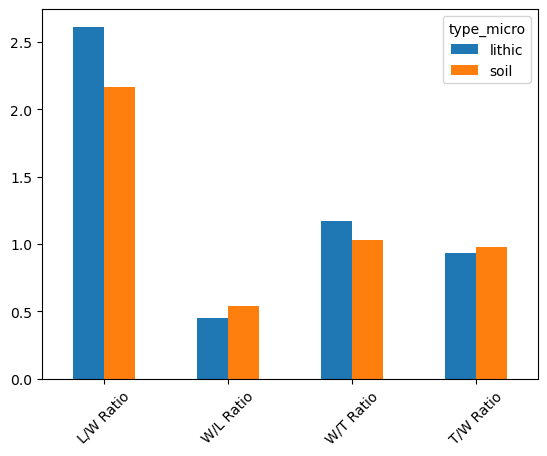

In [27]:
mean_by_group = micro.iloc[:, list(range(37,41)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 41 (CHull Surface Area)

(array([0]), <a list of 1 Text major ticklabel objects>)

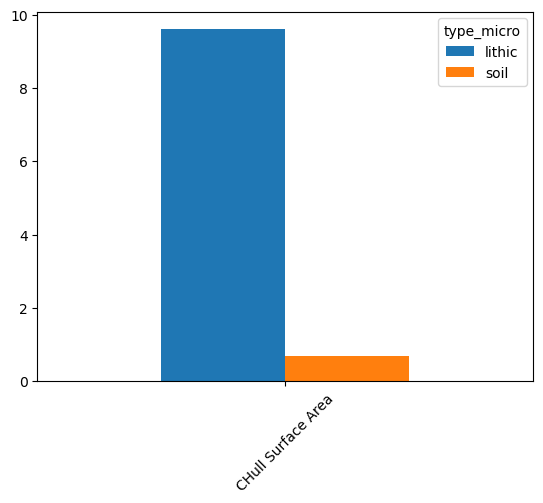

In [28]:
mean_by_group = micro.iloc[:, list(range(41,42)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 42 (Sieve)

(array([0]), <a list of 1 Text major ticklabel objects>)

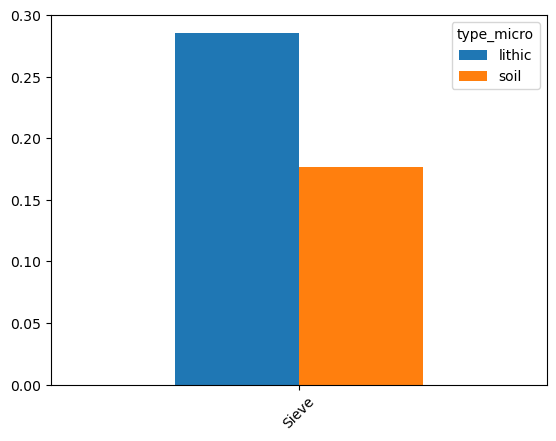

In [29]:
mean_by_group = micro.iloc[:, list(range(42,43)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 43 (Angularity)

(array([0]), <a list of 1 Text major ticklabel objects>)

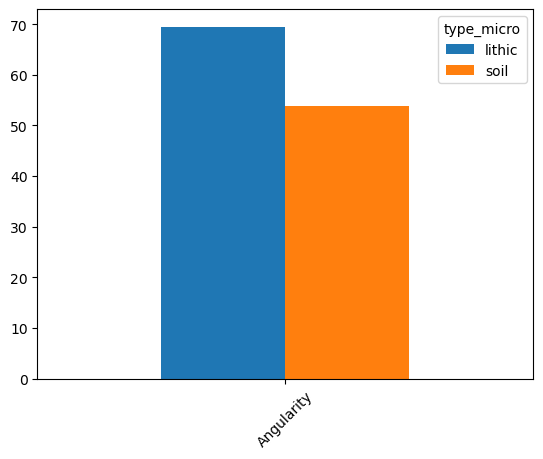

In [30]:
mean_by_group = micro.iloc[:, list(range(43,44)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 44 (Ellipticity)

(array([0]), <a list of 1 Text major ticklabel objects>)

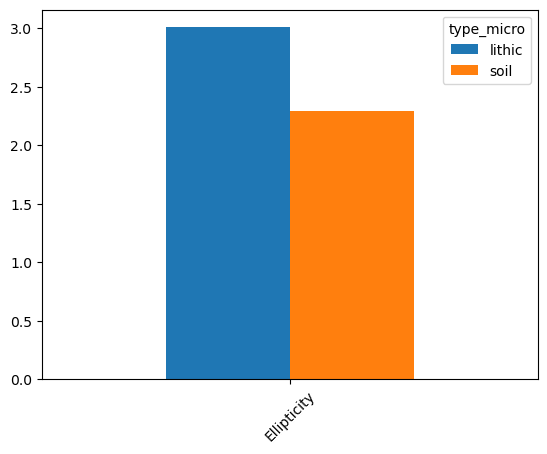

In [31]:
mean_by_group = micro.iloc[:, list(range(44,45)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 45-47 (Fiber Length, Fiber Width, Krumbein Rnd)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

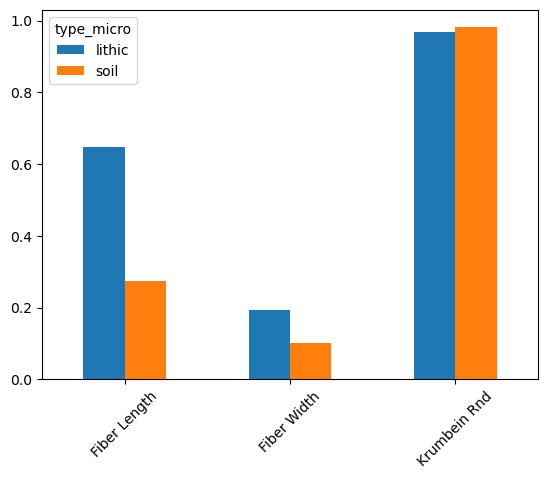

In [32]:
mean_by_group = micro.iloc[:, list(range(45,48)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

In [33]:
micro.head(1)

Id  Img Id      Da      Dp  FWidth  FLength  FThickness  ELength  \
0  104   10708  30.893  38.251  36.878   46.822      10.179   44.168   

   EThickness  EWidth  ...  T/W Ratio  CHull Surface Area   Sieve  Angularity  \
0      10.102  34.444  ...      0.276            3211.655  23.529      19.392   

   Ellipticity  Fiber Length  Fiber Width  Krumbein Rnd  size_micro  \
0        4.372        49.768       22.823         0.214     unknown   

   type_micro  
0      lithic  

[1 rows x 50 columns]

#### Distributions

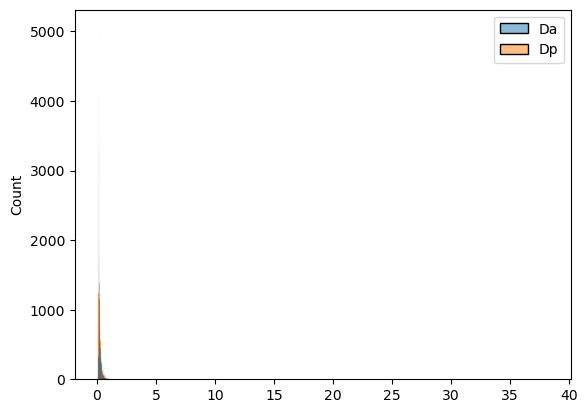

In [34]:
sns.histplot(data=micro[['Da','Dp']])

### Confusion Matrix

In [35]:
corr_matrix = micro.iloc[:,2:20].select_dtypes(include='number').corr()

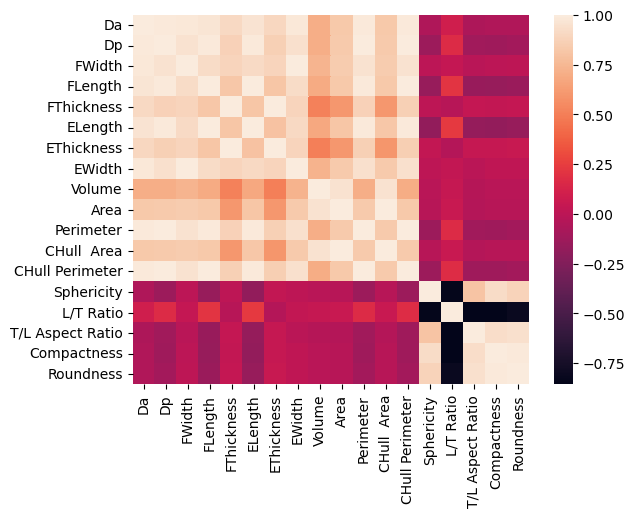

In [36]:
sns.heatmap(corr_matrix)

## Notes

In [37]:
# Outliers?